In [ ]:
         # Complete OCP Optimal Algae Control Model

using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I0 = 300.0
α = 0.1
L = 50.0
kR_bar = 1.5
z_bar = 35.0
n = 3
tf = 100.0

# ------------------ Biological Functions ------------------
function I_light(z)
    return I0 * exp(-α * z)
end

function vP(p, z)
    return kP * p * I_light(z) / (K + p * I_light(z))
end

function kR(z)
    return kR_bar * z^n / (z_bar^n + z^n)
end

# ------------------ OptimalControl Solution ------------------
function OCP(c0=0.2, p0=0.2, z0=20)
    ocp = @def begin
        t ∈ [0, tf], time
        x = (c, p, z) ∈ R^3, state
        U ∈ R^2, control
        c(0) == c0
        p(0) == p0
        z(0) == z0
        0 ≤ U(t)[1] ≤ 1
        -1 ≤ U(t)[2] ≤ 1
        0 ≤ c(t) ≤ 1
        0 ≤ p(t) ≤ 1
        0 ≤ z(t) ≤ L
        c(t) + p(t) ≤ 1
        ẋ(t) == [
            vP(p(t), z(t)) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
            U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t)) * p(t),
            U(t)[2]
        ]
        ∫(vP(p(t), z(t))) → max
    end

    sol1 = solve(ocp, :direct, :adnlp, :madnlp, grid_size=50, display=false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp, init=sol1, grid_size=100, display=false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp, init=sol2, grid_size=200, display=false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt, init=sol3, grid_size=300, display=false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt, init=sol4, grid_size=400, display=false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt, init=sol5, grid_size=500, display=false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt, init=sol6, grid_size=600, display=false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt, init=sol7, grid_size=700, display=false)
    sol = solve(ocp, :direct, :adnlp, :ipopt, init=sol8, grid_size=800, display=true)

    # ------------------ Results Visualization ------------------
    plt = plot(sol)
    display(plt)

    
    # ------------------ Extract and Print Solution Details ------------------
    #=
    λ = costate(sol)
    x = state(sol)
    U = control(sol)
    u = t -> U(t)[1]
    v = t -> U(t)[2]
    T = time_grid(sol)

    for i in eachindex(T)
        t = T[i]
        λ_val = λ(t)
        x_val = x(t)
        u_val = u(t)
        v_val = v(t)
        println("t = $(round(t, digits=2)) │ λ = $(round.(λ_val, digits=4)) │ c = $(round(x_val[1], digits=4)) │ p = $(round(x_val[2], digits=4)) │ z = $(round(x_val[3], digits=4)) │ u = $(round(u_val, digits=4)) │ v = $(round(v_val, digits=4))")
    end
    println("Maximum objective value ∫vP = ", objective(sol))  
    =# 
end 

OCP (generic function with 4 methods)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ny3ad8TKH6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_bAdi9utKTm\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_hY52fIniJS\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.81e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_9qbe1o3I3u\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_f0LATgngH6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_taZObGRq9k\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


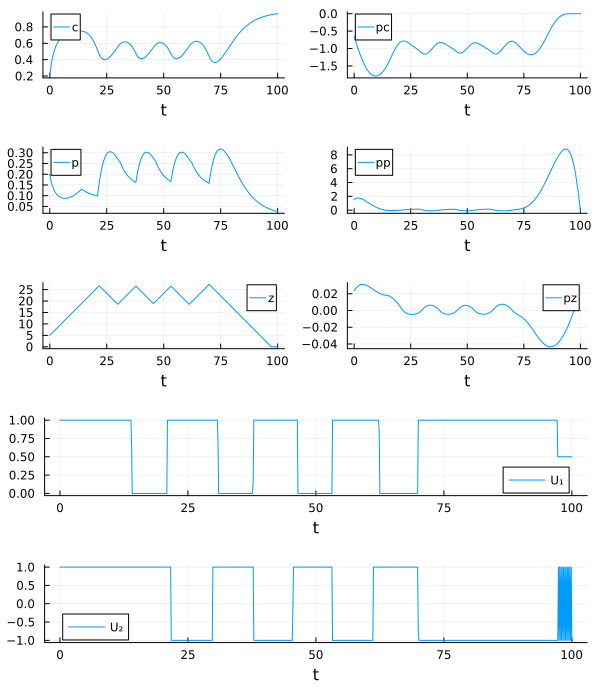

In [31]:
OCP(0.2, 0.2, 5)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_5Mt8fcNWXa\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jEREtEJAFE\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_7gteFGBm3M\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Js5ABOtQ9k\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

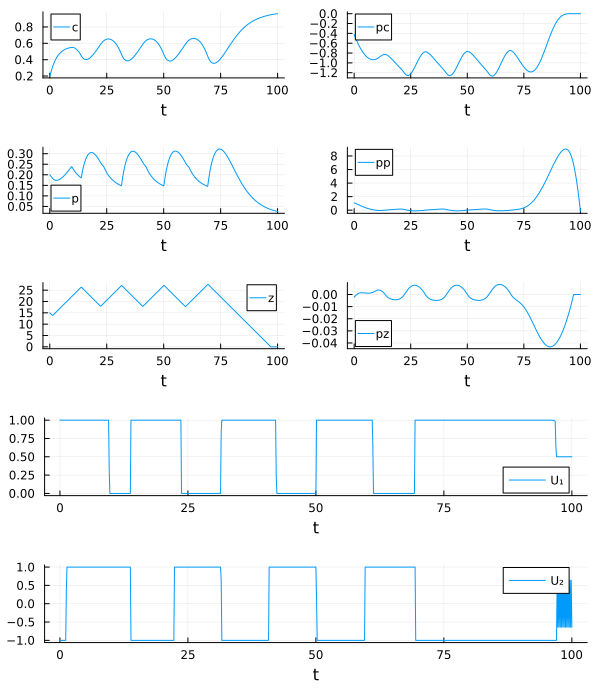

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.80e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_32BKD4nsL6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Xc3mtc3wDg\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


In [32]:
OCP(0.2, 0.2 ,15)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_lWTmnstuTw\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ZU1YJmJuNk\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_po5ip2Pyxy\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_3Uh0nM76vM\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.60e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_1ajm7oZsrI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_XsNkDKLqBS\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


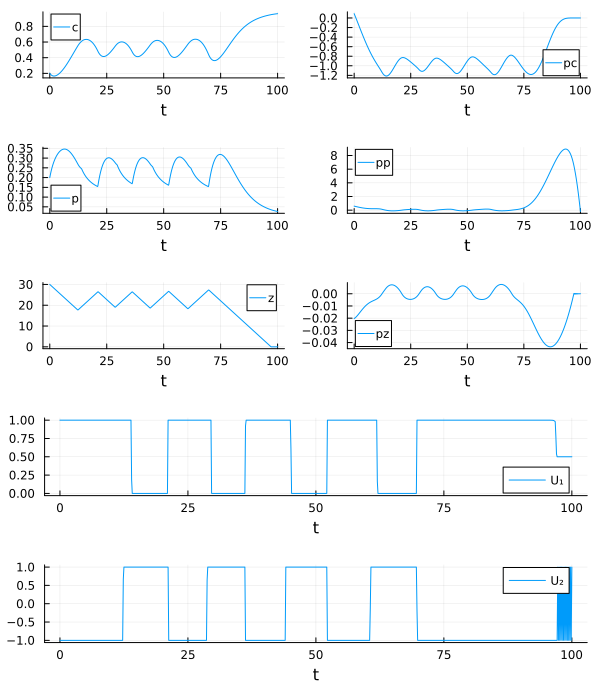

In [33]:
OCP(0.2, 0.2, 30)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_H45MfGZEBC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_d47clqdML6\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_1URcLafeN4\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_PSf8DGFm3W\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_RCDELa5Q5w\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_Tal2PgNUVy\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


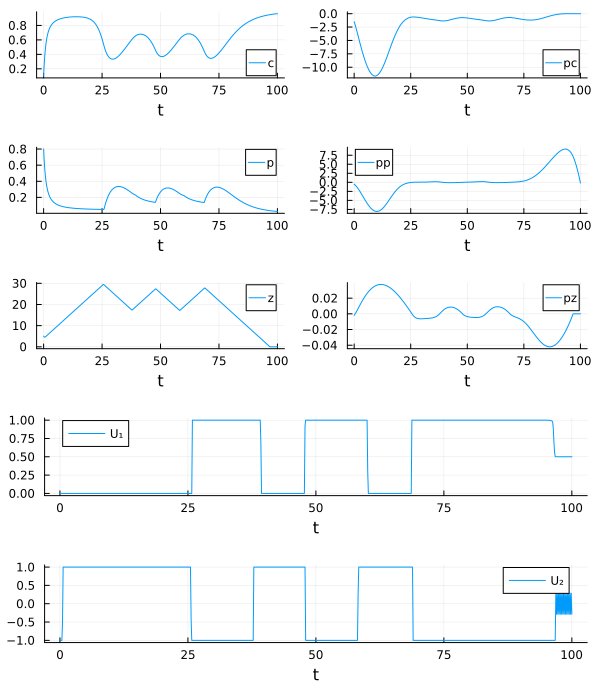

In [40]:
OCP(0.1,0.8,5)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_XshQp6XWpE\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ZCn8Zk9yf2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_HIPazOB8zu\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_X07YbarefI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.79e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_bwBapAJedy\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_X6jUjKjCnC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


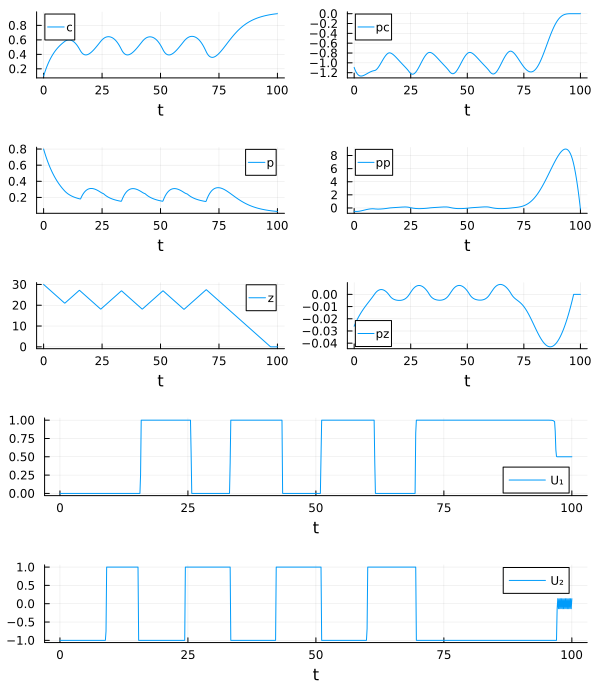

In [35]:
OCP(0.1, 0.8, 30)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_7QVg3mlwhW\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_JmFWDwDiH4\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_X8fkTSloN2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_vOF8vqLYrU\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.93e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_l4fYpc3iDm\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_LOpmhITixY\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


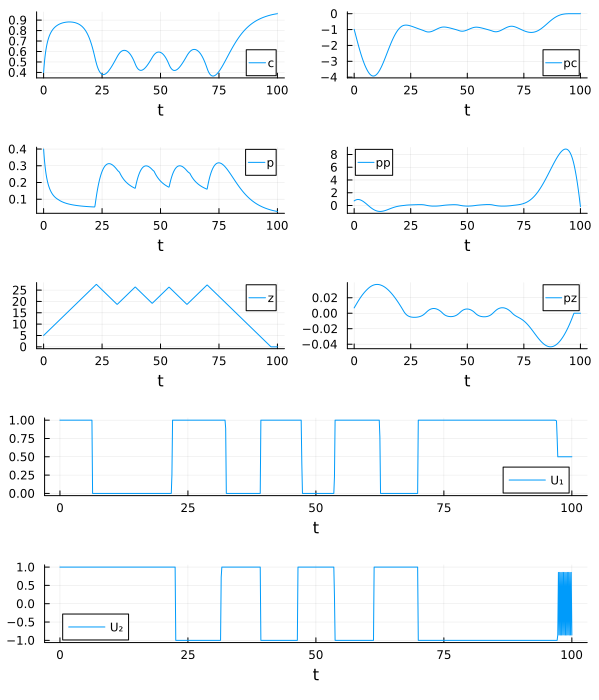

In [36]:
OCP(0.4, 0.4, 5)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_lCVQfCpEnk\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_vGNuh8BGX0\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_fWrEp03Axw\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_RUfKNyDQta\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 4.78e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_podmJkbCfI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_v8lWV6pylI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


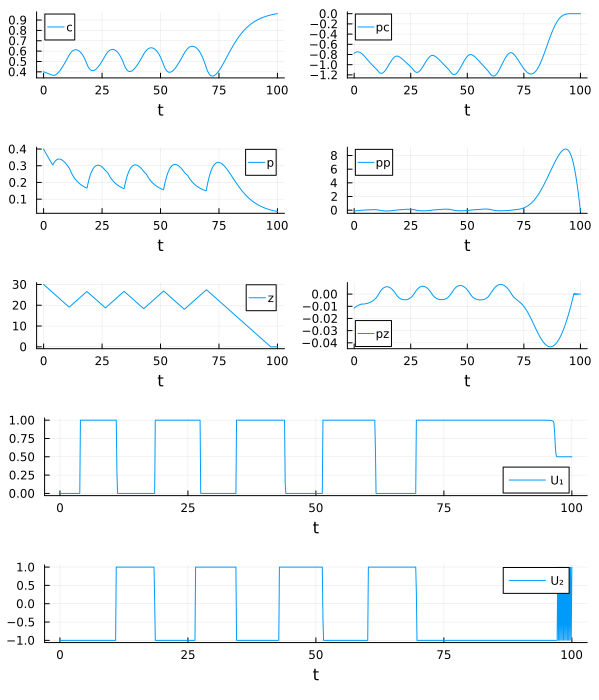

In [37]:
OCP(0.4, 0.4, 30)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_dwjMheLSvI\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_jq1uxs94x8\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_beJqd6HOJm\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_xS9gXOlY9s\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 3.84e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_H0v2lsR2fw\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_B6lIZi7iR2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


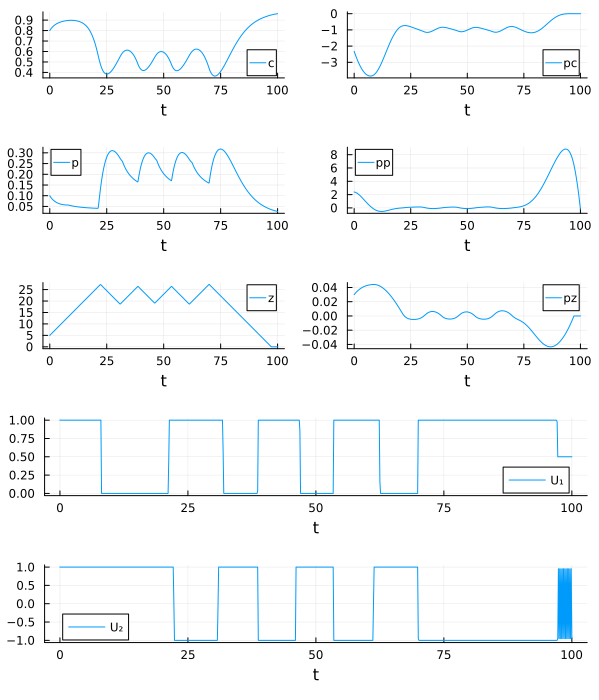

In [38]:
OCP(0.8, 0.1, 5)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_RSFANinsRi\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_XmXcrcNKL2\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_VSLm9cZkN8\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_peLo9ufEbC\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    19204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:     7209

Total number of variables............................:     4806
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3204
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.00e-01 7.76e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_NQLgLclIjk\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_NCr2ZShGDG\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


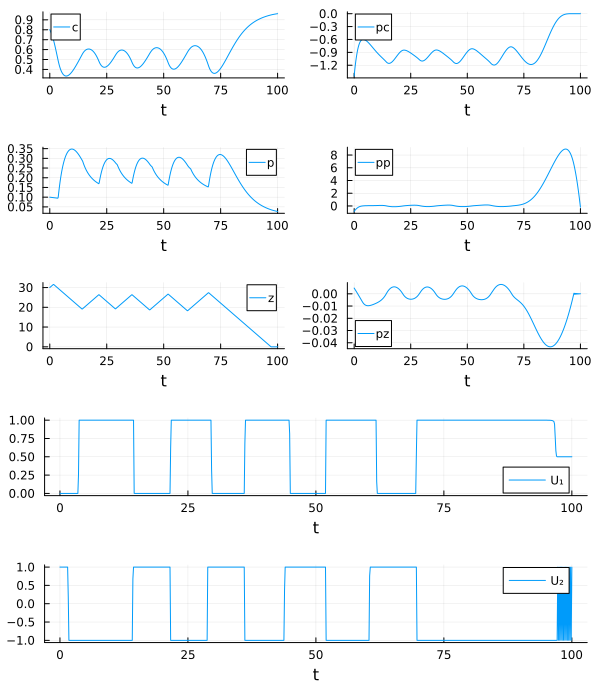

In [39]:
OCP(0.8, 0.1, 30)